<a href="https://colab.research.google.com/github/bruno353/Machine-Learning/blob/main/Breast_Cancer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process

###Goal of this dataset
The target is to predict if the cancer is 1 = malignant or 0 = benign.

###Manipulação Dados

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Breast_cancer.csv')

In [4]:
df.shape

(569, 33)

In [ ]:
df.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f775dfad3d0>,
      dtype=object)

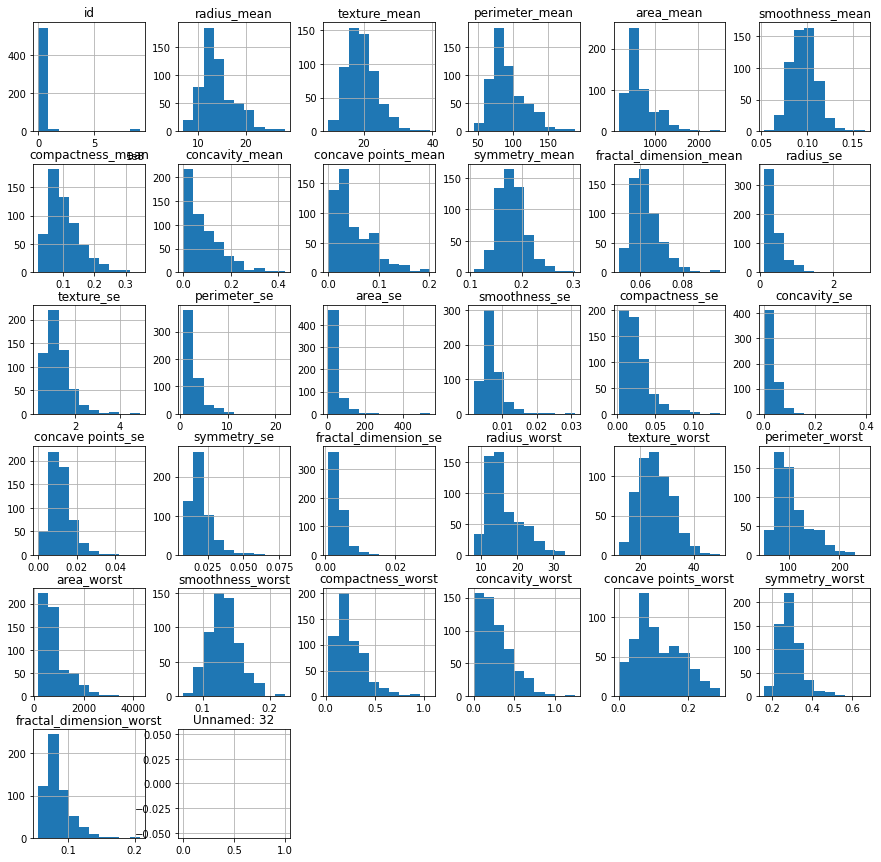

In [10]:
df.hist(figsize = (15,15))

In [ ]:
df.describe()

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df['Unnamed: 32'].isna().sum()

569

In [15]:
df.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [36]:
#fazendo Skewnes para ver se tem uma feature díspare.
df.skew(axis = 0, skipna = True)

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

In [37]:
df["area_mean"] = np.log(df["area_mean"])
df["compactness_mean"] = np.log(df["compactness_mean"])
df["concavity_mean"] = np.log(df["concavity_mean"])
df["radius_se"] = np.log(df["radius_se"])
df["perimeter_se"] = np.log(df["perimeter_se"])
df["area_se"] = np.log(df["area_se"])
df["smoothness_se"] = np.log(df["smoothness_se"])
df["concavity_se"] = np.log(df["concavity_se"])
df["symmetry_se"] = np.log(df["symmetry_se"])
df["fractal_dimension_se"] = np.log(df["fractal_dimension_se"])
df["area_worst"] = np.log(df["area_worst"])



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.dropna(inplace=True)

In [41]:
df.diagnosis = df["diagnosis"].apply(lambda x: 1 if x == 'M' else 0)

In [42]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,6.908755,0.11840,-1.281574,-1.203640,0.14710,0.2419,0.07871,0.090754,0.9053,2.150482,5.033049,-5.051614,0.04904,-2.923784,0.01587,-3.505558,-5.084336,25.38,17.33,184.60,7.610358,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,7.189922,0.08474,-2.542875,-2.442997,0.07017,0.1812,0.05667,-0.609726,0.7339,1.223187,4.305146,-5.254300,0.01308,-3.984594,0.01340,-4.276586,-5.645891,24.99,23.41,158.80,7.578657,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,7.092574,0.10960,-1.833207,-1.622523,0.12790,0.2069,0.05999,-0.293566,0.7869,1.522790,4.543614,-5.091303,0.04006,-3.261783,0.02058,-3.794240,-5.388023,23.57,25.53,152.50,7.443664,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,5.956096,0.14250,-1.259133,-1.421300,0.10520,0.2597,0.09744,-0.701986,1.1560,1.236924,3.304319,-4.698383,0.07458,-2.871570,0.01867,-2.819596,-4.687683,14.91,26.50,98.87,6.341593,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,7.167809,0.10030,-2.018911,-1.619488,0.10430,0.1809,0.05883,-0.278128,0.7813,1.693411,4.547965,-4.466278,0.02461,-2.866811,0.01885,-4.042132,-5.275578,22.54,16.67,152.20,7.362011,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
df = df.reset_index()

In [62]:
Y = df.diagnosis

In [63]:
X = df.drop(df[['diagnosis', 'id']], axis = 1)

In [64]:
#dividir entre test e train:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train[X_train.columns])
X_test = sc.transform(X_test[X_test.columns])

In [66]:
#vamos fazer um model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,plot_precision_recall_curve

logreg=Pipeline([('logistic',LogisticRegression())])
decision=Pipeline([('dt',DecisionTreeClassifier())])
randomforest=Pipeline([('rf',RandomForestClassifier())])
naivebayes=Pipeline([('nb',GaussianNB())])
knn=Pipeline([('knn',KNeighborsClassifier())])
gbc=Pipeline([('gbc',GradientBoostingClassifier())])
adaboost=Pipeline([('adaboost',AdaBoostClassifier())])
sgdclassifier=Pipeline([('SGDclassifier',SGDClassifier())])
svc=Pipeline([('svc',SVC())])
mlpclass=Pipeline([('mlpc',MLPClassifier())])
mypipeline1=[logreg,decision,randomforest,naivebayes,knn,gbc,adaboost,sgdclassifier,svc,mlpclass]
pipelinedict1={0:'logistic',1:'dt',2:'rf',3:'nb',4:'knn',5:'gbc',6:'adaboost',7:'SGDclassifier',
              8:'svc',9:'mlpc'}
for i in mypipeline1:
    i.fit(X_train,y_train)
model_score=[]
model_name=[]
for i,j in enumerate(mypipeline1):
    print("{} test accuracy: {}".format(pipelinedict1[i],j.score(X_test,y_test)))
    model_name.append(pipelinedict1[i])
    model_score.append(j.score(X_test,y_test))

logistic test accuracy: 0.9464285714285714
dt test accuracy: 0.9285714285714286
rf test accuracy: 0.9017857142857143
nb test accuracy: 0.9196428571428571
knn test accuracy: 0.9107142857142857
gbc test accuracy: 0.9196428571428571
adaboost test accuracy: 0.9375
SGDclassifier test accuracy: 0.9732142857142857
svc test accuracy: 0.9464285714285714
mlpc test accuracy: 0.9464285714285714


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9464285714285714

#Conclusion: The SGDclassifier model was the best, with an 0.97 *accuracy*